    Analyzing Exchange Rate Data with Python $^1$
    \author{Brian Dew, American University \\ \small{brian.dew@student.american.edu}\\ 
    	\href{https://briandew.wordpress.com/}{\small{briandew.wordpress.com}}}

$^1$ Based on an exercise by \href{https://subversion.american.edu/aisaac/isaac1.htm}{Professor Alan Issac}, American
University

# Nominal Exchange Rates

The nominal rate of exchange, \(e\), between the domestic currency and a
foreign currency is the number of units of domestic currency required to
purchase one unit of foreign currency. It is usually listed either
as a price at a specific point in time, the spot price, or as an average
of prices over a given period of time. Monthly nominal exchange rate
data from the U.S. Federal Reserve's G.5 release are used for this example. \\

First, we will need to get started with Python.

## Import libraries with conventional short names

I'm using the Enthought Canopy Python analysis environment, which already includes the libraries needed for this exercise. We will need to import libraries and give them conventional short names.

In [7]:
import datetime
from datetime import date
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Let's check which versions of these libraries are being used.

In [8]:
print("numpy version {}".format(np.__version__))
print("matplotlib version {}".format(mpl.__version__))
print("pandas version {}".format(pd.__version__))

numpy version 1.10.4
matplotlib version 1.5.1
pandas version 0.18.0


## Example: Import nominal exchange rate data from FRED

\href{https://research.stlouisfed.org/}{Federal Reserve Economic Data (FRED)} is a very useful source of US
and international time series. FRED is constantly
expanding, and already contains more than 350,000 time series. Using
pandas DataReader, we are able to import data directly from FRED for further
analysis. By searching FRED, we can identify time series of interest and retrieve them for further analysis. In this case, let's select the series called EXCAUS, which is the nominal exchange rate of Canadian Dollars (CAD) per U.S. Dollar (USD).

In [9]:
import pandas.io.data as webdata
tstart = datetime.datetime(1974, 1, 1)
tend = datetime.datetime(2016, 5, 1)
#get the CAD per USD exchange rate
excaus = webdata.DataReader("EXCAUS", "fred", tstart, tend);
#display six most recent observations
pd.DataFrame.tail(excaus)

,EXCAUS
DATE,
2015-12-01,1.3713
2016-01-01,1.4208
2016-02-01,1.3797
2016-03-01,1.3226
2016-04-01,1.2971


FRED has given us the monthly average number of CAD needed to
buy one USD, as well as a date index of the month associated with each
exchange rate observation. Since our analysis is conducted in the U.S.,
we are interested in the reciprocal of what FRED has provided, the
number of USD needed to purchase one CAD.

In [10]:
#use reciprocal to obtain USD per CAD exchange rate
excaus['exusca'] = 1/excaus
excaus.columns = ['EXCAUS', 'EXUSCA']
pd.DataFrame.tail(excaus)

,EXCAUS,EXUSCA
DATE,,
2015-12-01,1.3713,0.729235
2016-01-01,1.4208,0.703829
2016-02-01,1.3797,0.724795
2016-03-01,1.3226,0.756086
2016-04-01,1.2971,0.770951


Let's check basic descriptive statistics for the nominal exchange rate between the USD and CAD. As seen below, since 1974, the USD has been, on average, roughly 18 percent stronger than the Canadian dollar. In the most recent observation from Fred, the USD was much stronger against the CAD than the long-term average, with 73 U.S. cents buying a loonie. 

In [11]:
excaus.EXUSCA.describe()

count    508.000000
mean       0.827547
std        0.110290
min        0.625117
25%        0.734929
50%        0.821997
75%        0.901043
max        1.046792
Name: EXUSCA, dtype: float64

To get an even better idea of how the USD/CAD exchange rate has changed over
time, let's produce a time series line plot of the nominal exchange rate
between the USD and the CAD. 

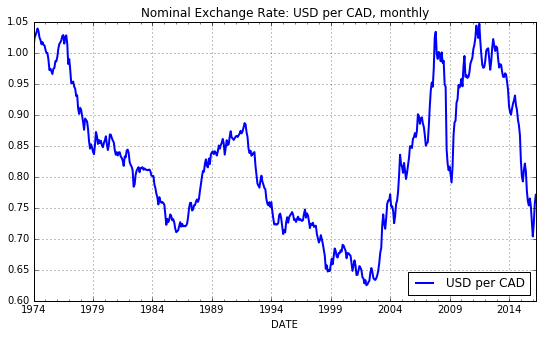

In [12]:
nomusca = excaus['EXUSCA']
exuscaplot = nomusca.plot(label='USD per CAD', grid=True, figsize=(9, 5), color="blue", linewidth=2,)
L=plt.legend(loc=4)
L.get_texts()[0].set_text('USD per CAD')
plt.title('Nominal Exchange Rate: USD per CAD, monthly');

\newpage

# Real Exchange Rates

   The nominal exchange rate tells us how many dollars are needed to
purchase a unit of foreign currency, at a certain point in time. It does
not, however, tell us about how the purchasing power of the domestic and
foreign currencies have changed over time from inflation and
deflation. To filter out the effects on exchange rates from changes in
price levels, we can construct the \textbf{real exchange rate}.

## Import Exchange Rate and Price Data from FRED 

   First, we will need to import exchange rate and price data from FRED.
Let's grab nominal exchange rate and consumer price index (CPI) information for some
of the major US trading partners, starting again with Canada, and adding
Japan, the EU, and the U.K. One major advantage of using FRED for this
task is the consistency and automatic indexing of dates. If the same
data were gathered from several sources, a significant amount of time
would be spent on harmonizing the dates. The pandas DataReader and FRED
make this easy. The consequence is some latency in data availability.
For example, as of late January 2016, CPI data for Canada has been
published by StatsCan for December 2015, yet the latest available
observation in Fred is March 2015. \\

As was the case with Canada, we will need the inverse of FRED's JPY/USD
exchange rate series to obtain the USD/JPY series. I will also download CPI and exchange rate data for other currencies to use later.

In [13]:
# get exchange rage and price measures from FRED
frednames = "EXCAUS", "EXJPUS", "EXUSEU", "EXUSUK", "CPIAUCNS", "CPALCY01CAM661N", \
    "CPALCY01JPM661N", "CP0000EZ17M086NEST", "CP0000GBM086NEST", "EXCHUS",  \
    "CPALTT01CNM659N", "EXMXUS", "EXBZUS", "EXINUS", "EXSZUS", "EXSFUS", \
    "CPALCY01MXM661N", "CHNCPIALLMINMEI", "BRACPIALLMINMEI", "INDCPIALLMINMEI", \
    "CHECPIALLMINMEI", "ZAFCPIALLMINMEI"
fdata = webdata.DataReader(frednames, "fred", tstart, tend);
# add direct rates for CAD and JPY to fdata (and others)
fdata["usdcad"] = 1.0 / fdata.EXCAUS
fdata["usdjpy"] = 1.0 / fdata.EXJPUS
fdata["usdcny"] = 1.0 / fdata.EXCHUS
fdata["usdmxp"] = 1.0 / fdata.EXMXUS
fdata["usdinr"] = 1.0 / fdata.EXINUS
fdata["usdchf"] = 1.0 / fdata.EXSZUS
fdata["usdzar"] = 1.0 / fdata.EXSFUS
fdata["usdbrl"] = 1.0 / fdata.EXBZUS
pd.DataFrame(fdata);

## Generating real exchange rates for USD per CAD

The real exchange rate, $RER$, is calculated as the nominal exchange rate, $e$, times the foreign price level, $P^*$, divided by the domestic price level, $P$:

$\quad \quad RER \ = \ \frac{eP^*}{P}$

In [14]:
usdcad = fdata.usdcad
p_us = fdata.CPIAUCNS
p_ca = fdata.CPALCY01CAM661N
##real exchange rate = eP*/P
fdata['realUSDCAD'] = usdcad * p_ca / p_us
realusca= fdata.realUSDCAD
fdata.realUSDCAD.describe()

count    495.000000
mean       0.004057
std        0.000478
min        0.003016
25%        0.003707
50%        0.004081
75%        0.004465
max        0.004930
Name: realUSDCAD, dtype: float64

Let's look at a plot of the real exchange rate for USD/CAD. Volatility is more constant over time on a real basis. The
difference between real and nominal rates is not particularly dramatic,
however.

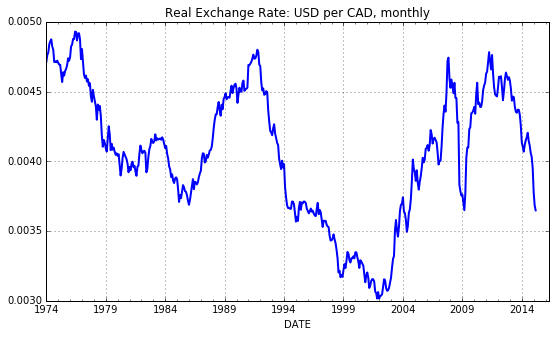

In [15]:
realusca.plot(grid=True, figsize=(9, 5), color="blue", linewidth=2,)
plt.title('Real Exchange Rate: USD per CAD, monthly');

## Generating real exchange rates for other major partners

Let's continue by producing real exchange rates for the yen, euro, and
pound. First, the real exchange rate of USD per Japanese Yen (JPY).

In [16]:
usdjpy = fdata.usdjpy
p_us = fdata.CPIAUCNS
p_jp = fdata.CPALCY01JPM661N
##real exchange rate = eP*/P
fdata['realUSDJPY'] = usdjpy * p_jp / p_us
realusjp= fdata.realUSDJPY
fdata.realUSDJPY.describe()

count    495.000000
mean       0.000049
std        0.000010
min        0.000032
25%        0.000041
50%        0.000049
75%        0.000055
max        0.000082
Name: realUSDJPY, dtype: float64

Next, let's make a plot of the real exchange rate for USD per JPY. We
notice a dramatic peak in the mid-1990s. The USD is now stronger against
the yen (it takes fewer dollars to buy yen), on a real basis, than it
has been since the mid-1980s. One possibility for the present weakness
of the yen is the aggressive monetary and economic policy in Japan,
often referred to as Abenomics.

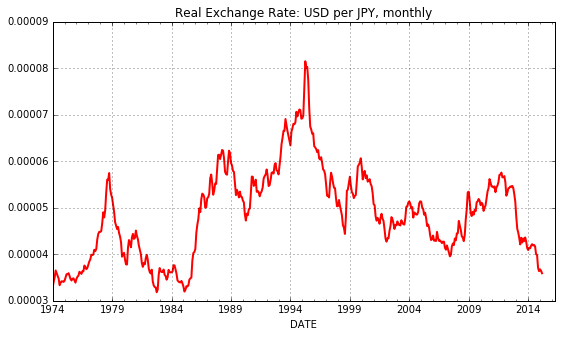

In [17]:
realusjp.plot(grid=True, figsize=(9, 5), color="red", linewidth=2,)
plt.title('Real Exchange Rate: USD per JPY, monthly');

Next, we produce a serier for the real exchange rate of USD per Euro (EUR).

In [18]:
usdeur = fdata.EXUSEU
p_us = fdata.CPIAUCNS
p_eu = fdata.CP0000EZ17M086NEST
##real exchange rate = eP*/P
fdata['realUSDEUR'] = usdeur * p_eu / p_us
realuseu= fdata.realUSDEUR
fdata.realUSDEUR.describe()

count    204.000000
mean       0.619530
std        0.083991
min        0.441536
25%        0.557541
50%        0.643633
75%        0.677339
max        0.789082
Name: realUSDEUR, dtype: float64

Let's make a plot of the real exchange rate between the USD and the
Euro, adjusting the x-axis to start in 1999, when the common currency
was introduced. We notice that the euro has also weakened against the
dollar over the past couple of years.

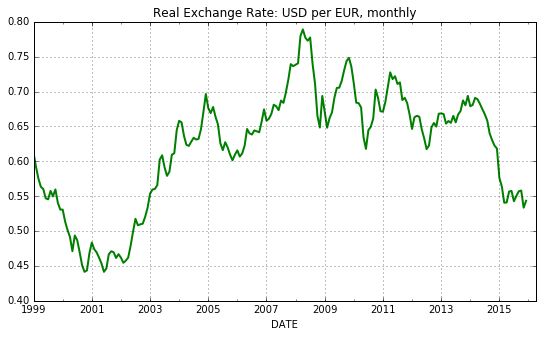

In [19]:
realuseu[300:].plot(grid=True, figsize=(9, 5), color="green", linewidth=2,)
plt.title('Real Exchange Rate: USD per EUR, monthly');

Finally, let's produce a series for the real rate of exchange of USD per British Pount (GBP).

In [20]:
usdgbp = fdata.EXUSUK
p_us = fdata.CPIAUCNS
p_uk = fdata.CP0000GBM086NEST
##real exchange rate = eP*/P
fdata['realUSDGBP'] = usdgbp * p_uk / p_us
realusuk= fdata.realUSDGBP
fdata.realUSDGBP.describe()

count    241.000000
mean       0.683285
std        0.053143
min        0.571572
25%        0.647903
50%        0.678572
75%        0.720349
max        0.812569
Name: realUSDGBP, dtype: float64

A plot of the real exchange rate series of USD per GBP is below. The
dramatic fall of nearly 25 percent during the financial crisis stands out as one of the most rapid changes in real exchange rates in our data. Data is available in FRED from 1997, when the Bank of England gained independence. 

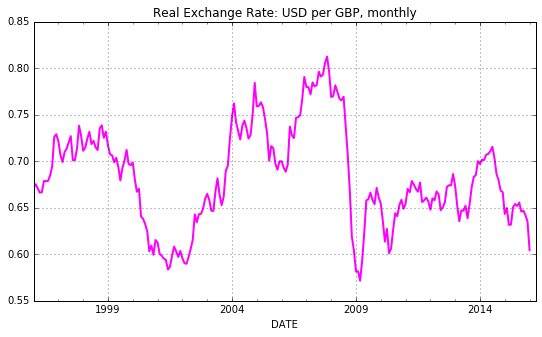

In [21]:
realusuk[264:].plot(grid=True, figsize=(9, 5), color="magenta", linewidth=2,)
plt.title('Real Exchange Rate: USD per GBP, monthly');

In [22]:
usdcny = fdata.usdcny
usdmxp = fdata.usdmxp
usdinr = fdata.usdinr
usdchf = fdata.usdchf
usdbrl = fdata.usdbrl
usdzar = fdata.usdzar
p_us = fdata.CPIAUCNS
p_cn = fdata.CHNCPIALLMINMEI
p_mx = fdata.CPALCY01MXM661N
p_bz = fdata.BRACPIALLMINMEI
p_in = fdata.INDCPIALLMINMEI
p_sz = fdata.CHECPIALLMINMEI
p_sf = fdata.ZAFCPIALLMINMEI
##real exchange rates 
fdata['realUSDCNY'] = usdcny * p_cn / p_us
realuscn = fdata.realUSDCNY
fdata['realUSDMXP'] = usdmxp * p_mx / p_us
realusnx = fdata.realUSDMXP
fdata['realUSDINR'] = usdinr * p_in / p_us
realusin = fdata.realUSDINR
fdata['realUSDCHF'] = usdchf * p_sz / p_us
realussz = fdata.realUSDCHF
fdata['realUSDBRL'] = usdbrl * p_bz / p_us
realusbz = fdata.realUSDBRL
fdata['realUSDZAR'] = usdzar * p_sf / p_us
realussf = fdata.realUSDZAR

\newpage

# The Moving Average Smoother

## Applying a moving average to the real exchange rate

    One way to smooth the data, and reduce some of the noise, is to apply a moving average. Pandas refers
to this as the rolling mean. I've applied a twelve month moving average
to the USD/CAD series, and plotted the result below as a green line. The moving average is smoother than the monthly time series, as is expected, and the moving average tracks the general trend of the series well. \\

A time series crossing its moving average may be an indication of a shift in the
direction of the series. When the series crosses its moving from above, the series is taking a downward turn, and likewise, when the series crosses its moving average from below, it is an indication of an upturn. 

C:\Users\BDew\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  from ipykernel import kernelapp as app


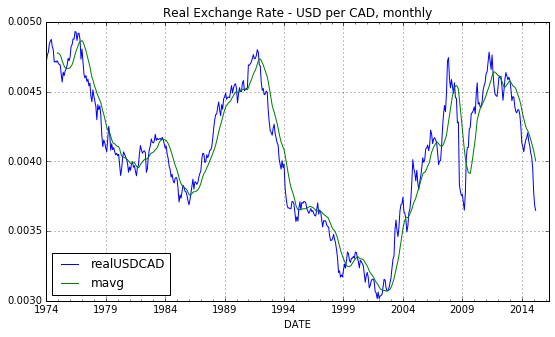

In [23]:
# Generate moving average
fdata['mavg'] = pd.rolling_mean(realusca, 12) 
fdata[['realUSDCAD', 'mavg']].plot(grid=True, figsize=(9, 5))
plt.title('Real Exchange Rate - USD per CAD, monthly');

\newpage

# Rate of Return

## Definition

The raw foreign currency return is the present period spot price divided by the previous period spot price, minus one.

$ \quad \quad dls_t \ = \ \frac{S_t - S_{t-1}}{S_{t-1}} \ = \ \frac{S_t}{S_{t-1}} - 1 $

## Example with real exchange rates

The montly rate of return from November 2014 to March 2015 is shown below, in percentage terms. This was a volatile period for many currencies. For example, the dollar strengthened by almost seven percent against the yen in November 2014, and more than six percent against the Euro in January 2015. Emerging markets are far from immune to this volatility. The dollar strengthened against the Brazilian real by more than fiteen percent on a real basis during February and March 2015. 

In [24]:
dls = fdata[['realUSDCNY', 'realUSDJPY', 'realUSDINR',\
             'realUSDGBP', 'realUSDCHF', 'realUSDEUR',\
            'realUSDBRL', 'realUSDCAD', 'realUSDMXP',\
             'realUSDZAR']].pct_change() * 100
pd.DataFrame.tail(dls[:495])

,realUSDCNY,realUSDJPY,realUSDINR,realUSDGBP,realUSDCHF,realUSDEUR,realUSDBRL,realUSDCAD,realUSDMXP,realUSDZAR
DATE,,,,,,,,,,
2014-11-01,0.345099,-6.974802,0.027793,-1.647156,-0.684562,-1.251025,-3.029833,-0.700964,-0.054821,0.264547
2014-12-01,-0.169193,-1.882127,-1.072539,-0.239624,-1.067338,-0.683613,-2.066485,-1.952998,-5.068713,-3.167971
2015-01-01,0.301840,1.086276,1.806879,-3.528469,3.324407,-6.816850,1.999460,-4.417382,-0.759631,-0.097420
2015-02-01,0.216366,-0.860007,-0.601246,1.000224,0.181629,-2.074590,-5.743430,-2.492767,-1.737588,-0.016292
2015-03-01,-0.879414,-1.458666,-0.981419,-2.802601,-4.715559,-4.170301,-9.680399,-0.973732,-2.416345,-3.599253


Plotting the monthly return produces what may seem like white noise. The
combined plot of monthly USD returns against five major trading partners' currencies does
help to show periods of excessive volatility (such as the devaluation of the Mexican peso in late 1994) some general trends, and
the relative levels of volatility between currency returns. The yen, for
example, seems extremely volatile compared to the Canadian dollar, in
all periods other than the U.S. great recession.

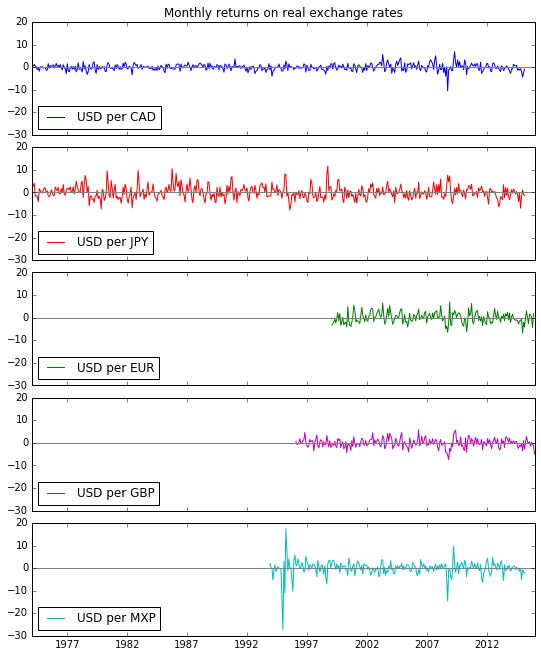

In [25]:
# Five subplots sharing both x- and y- axes
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, sharey=True, \
                                       figsize=(9, 11))
ax1.plot(dls.realUSDCAD[1:])
ax1.set_title('Monthly returns on real exchange rates')
ax1.axhline(0, color='gray', lw=1)
ax1.legend(loc='lower left').get_texts()[0].set_text('USD per CAD')
ax2.plot(dls.realUSDJPY[1:], 'r')
ax2.axhline(0, color='gray', lw=1)
ax2.legend(loc='lower left').get_texts()[0].set_text('USD per JPY')
ax3.plot(dls.realUSDEUR[1:], 'g')
ax3.axhline(0, color='gray', lw=1)
ax3.legend(loc='lower left').get_texts()[0].set_text('USD per EUR')
ax4.plot(dls.realUSDGBP[1:], 'm')
ax4.axhline(0, color='gray', lw=1)
ax4.legend(loc='lower left').get_texts()[0].set_text('USD per GBP')
ax5.plot(dls.realUSDMXP[1:], 'c')
ax5.axhline(0, color='gray', lw=1)
ax5.legend(loc='lower left').get_texts()[0].set_text('USD per MXP')
# Adjustments to space between subfigures and ticks
f.subplots_adjust(hspace=0.11)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False);

In [26]:
apy = (1+dls)**12 - 1

In [27]:
print(dls.corr())
print(apy.corr())

            realUSDCNY  realUSDJPY  realUSDINR  realUSDGBP  realUSDCHF  \
realUSDCNY    1.000000    0.072982    0.028586    0.002798    0.082490   
realUSDJPY    0.072982    1.000000    0.202017    0.180483    0.548858   
realUSDINR    0.028586    0.202017    1.000000    0.212042    0.325443   
realUSDGBP    0.002798    0.180483    0.212042    1.000000    0.584354   
realUSDCHF    0.082490    0.548858    0.325443    0.584354    1.000000   
realUSDEUR    0.046152    0.281810    0.274062    0.685319    0.828604   
realUSDBRL    0.016962   -0.089222    0.372344    0.211464    0.145128   
realUSDCAD   -0.055110    0.047366    0.227131    0.413896    0.180493   
realUSDMXP   -0.026867   -0.119249    0.270533    0.126479   -0.119266   
realUSDZAR   -0.006296    0.219482    0.235022    0.316508    0.331689   

            realUSDEUR  realUSDBRL  realUSDCAD  realUSDMXP  realUSDZAR  
realUSDCNY    0.046152    0.016962   -0.055110   -0.026867   -0.006296  
realUSDJPY    0.281810   -0.089222    0

## Correlations between real exchange rates

Python makes it very easy to calculate the correlation between time
series, such as real USD exchange rates. The results show some clustering, with the highest correlation between the USD and the Euro, Swiss Franc, and British Pound. There is also a modest correlation in the 30-40 percent range between the USD and the currencies listed below that reside in the western hemisphere (CAD, MXP, BRL). The Chinese Yuan also stands out. The Chinese currency trades within a range of a peg to the USD, and is the only currency on the list to do. Therefore, it is not significantly correlated with other currencies USD real exchange rate.

In [28]:
dls.corr()

,realUSDCNY,realUSDJPY,realUSDINR,realUSDGBP,realUSDCHF,realUSDEUR,realUSDBRL,realUSDCAD,realUSDMXP,realUSDZAR
realUSDCNY,1.000000,0.072982,0.028586,0.002798,0.082490,0.046152,0.016962,-0.055110,-0.026867,-0.006296
realUSDJPY,0.072982,1.000000,0.202017,0.180483,0.548858,0.281810,-0.089222,0.047366,-0.119249,0.219482
realUSDINR,0.028586,0.202017,1.000000,0.212042,0.325443,0.274062,0.372344,0.227131,0.270533,0.235022
realUSDGBP,0.002798,0.180483,0.212042,1.000000,0.584354,0.685319,0.211464,0.413896,0.126479,0.316508
realUSDCHF,0.082490,0.548858,0.325443,0.584354,1.000000,0.828604,0.145128,0.180493,-0.119266,0.331689
realUSDEUR,0.046152,0.281810,0.274062,0.685319,0.828604,1.000000,0.246365,0.466868,0.145709,0.401513
realUSDBRL,0.016962,-0.089222,0.372344,0.211464,0.145128,0.246365,1.000000,0.366593,0.351684,0.269588
realUSDCAD,-0.055110,0.047366,0.227131,0.413896,0.180493,0.466868,0.366593,1.000000,0.345292,0.302185
realUSDMXP,-0.026867,-0.119249,0.270533,0.126479,-0.119266,0.145709,0.351684,0.345292,1.000000,0.172507
realUSDZAR,-0.006296,0.219482,0.235022,0.316508,0.331689,0.401513,0.269588,0.302185,0.172507,1.000000


When many series are involved, vizualization of correlation using a
heatmap, such as the one below, can be helpful. Exchange rates comparisons with higher
correlations have darker blue boxes.

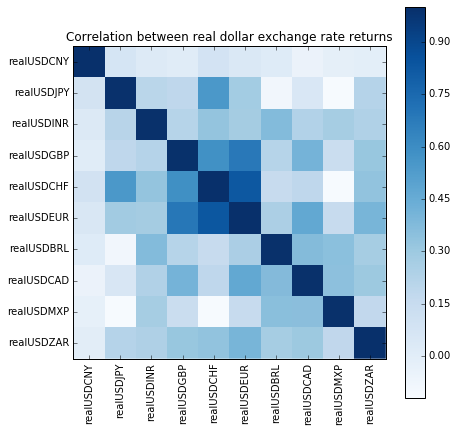

In [29]:
fig, ax = plt.subplots(1,1, figsize=(7, 7))
ax.set_title('Correlation between real dollar exchange rate returns')
corr = dls.corr()
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);

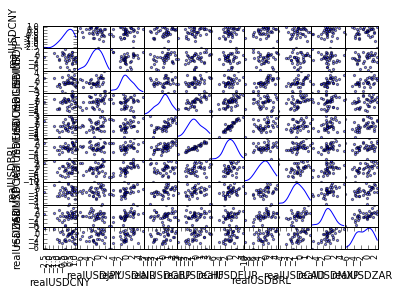

In [30]:
pd.scatter_matrix(dls[-50::], diagonal='kde');

## Riskiness of currency returns

Beyond the mean value of currency returns, it is important to consider the risk and level of volatility. One example, adapted from Thomas Wiecki's Financial Analysis in Python, provides a small scatter plot comparing the mean and standard deviation of real exchange rate basis currency returns. The standard deviation serves as a simple proxy for volatility in the percentage term monthly currency return. The mean, if above zero, shows the average monthly gain, and if below zero, the average monthly loss, during the period for which data has been collected.

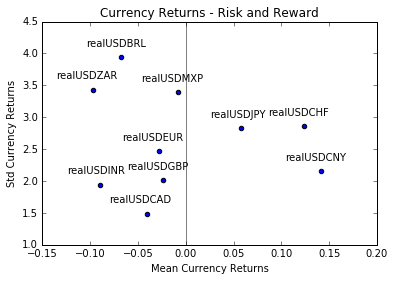

In [31]:
# Adapted from Thomas Wiecki’s Financial Analysis in Python
plt.scatter(dls.mean(), dls.std())
plt.title('Currency Returns - Risk and Reward')
plt.xlabel('Mean Currency Returns')
plt.ylabel('Std Currency Returns')
plt.axvline(0, color='gray', lw=1)
for label, x, y in zip(dls.columns, dls.mean(), dls.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (25, 9),
        textcoords = 'offset points', ha = 'right', va = 'bottom')

## Z Scores of Real Exchange Rates

One way to compare real exchange rates, given that the value of their level does not have much meaning, is to compute the z score and compare real exchange rate z scores over time. The z score of a real exchange rate will move in the same direction as the original rate, but have a mean equal to zero and a standard deviation of one. 

$\quad \quad \quad RER_{z, ij} = \frac{RER_{ij} - E(RER_{ij})}{\sigma(RER_{ij})}$

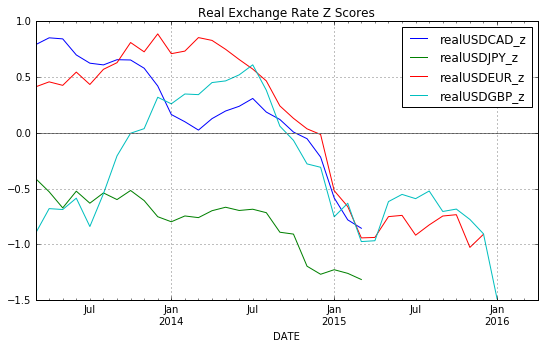

In [32]:
rer = fdata[['realUSDCAD', 'realUSDJPY', 'realUSDEUR',\
             'realUSDGBP']]

rer.to_csv("rer.csv")

cols = list(rer)
fdata[cols]

for col in cols:
    col_zscore = col + '_z'
    fdata[col_zscore] = (fdata[col] - fdata[col].mean())/fdata[col].std(ddof=0)

zrer = fdata[['realUSDCAD_z', 'realUSDJPY_z', 'realUSDEUR_z',\
             'realUSDGBP_z']]
zcols = list(zrer);

# Plot z scores of real exchange rates
fdata[zcols][470:].plot(grid=True, figsize=(9, 5))
plt.title('Real Exchange Rate Z Scores')
plt.axhline(0, color='gray', lw=1);

The z scores seem to move in the same direction from the second half of 2014 onward. Oil prices, along with the prices for many other commodoties, which are generally priced in US dollars, collapsed during this period. Is this a coincidence? 

In [33]:
uscalnd = np.diff(np.log(fdata['realUSDCAD']))
uscpilnd = np.diff(np.log(fdata['CPIAUCNS']))
tdata = [uscalnd, uscpilnd]
pd.DataFrame(tdata)

,0,1,2,3,4,5,6,7,8,9,...,497,498,499,500,501,502,503,504,505,506
0,0.010317,0.003924,0.012058,0.004631,0.002761,-0.010803,-0.004580,-0.018540,0.001000,-0.001294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.012793,0.012632,0.004175,0.012423,0.008197,0.008130,0.012073,0.011929,0.009833,0.007797,...,0.000067,-0.001417,-0.001558,-0.00045,-0.002113,-0.003423,0.001652,0.000823,0.004297,NaN


# Decomposing Exchange Rates into Real and Nominal Factors

Using an example from Walter Ender's Applied Econometric Time Series, we will look at the USD to CAD nominal and real exchange rates response to nominal and real shocks. Nominal shocks are those related to things like money supply changes by central banks, or speculative investors actions in foreign exchange markets. Real shocks are those that come from changes to the price of goods and services in the domestic or foreign economy. 

## Theoretical background

Following the theory in Enders, real shocks cause permanent changes to the exchange rate, but nominal shocks cause only temporary effects. That is to say, if the late 2014 swing in exchange rates is a response to a real shock, the results would be more permanent and the strengthening of the dollar will be an even greater challenge to policy makers at the Fed.

## Testing the theory

The first step to testing this model is to check whether the series are stationary. We will use the first difference of the log of the US CPI and Canadian CPI and the first difference of the log of the nominal and real exchange rates.

In [34]:
decompusca = fdata[['CPIAUCNS', 'CPALCY01CAM661N', 'realUSDCAD', 'usdcad']]
dcols = list(decompusca)
for dcol in dcols:
    col_ln = dcol + '_ln'
    fdata[col_ln] = np.log(fdata[dcol])

Let's apply an augmented Dickey Fuller (ADF) unit root test on the first difference of the natural log real exchange rate. We will first need to import the statsmodel library to help with our time series analysis.

(-1.8738166249284101, 0.34447704939610696, 1L)


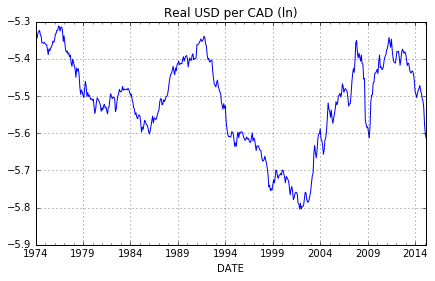

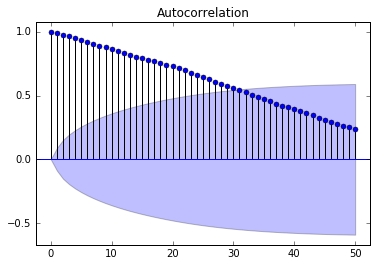

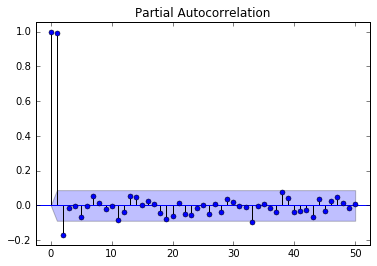

In [35]:
import statsmodels.tsa.stattools as ts
import statsmodels.graphics.tsaplots as tsg

# Plot ln(real exchange rate)
fdata['realUSDCAD_ln'].dropna().plot(grid=True, figsize=(7, 4))
plt.title('Real USD per CAD (ln)');
# Plot ACF
tsg.plot_acf(fdata['realUSDCAD_ln'].dropna(), lags=50);
# Plot PACF
tsg.plot_pacf(fdata['realUSDCAD_ln'].dropna(), lags=50);
# Run Augmented Dickey Fuller Unit Root Test and print results
results = ts.adfuller(fdata['realUSDCAD_ln'].dropna())
print(results)[:3]

All four steps above show that the natural log real exchange rate of USD per CAD does not have a unit root. According to the ADF test results, we fail to reject the null hypothesis that the exchange rate follows

(-17.969295937988836,
 2.7992969267115446e-30,
 {'1%': -3.4436840273842058,
  '10%': -2.5699020441557052,
  '5%': -2.8674204319994674},
 <statsmodels.tsa.stattools.ResultsStore at 0x171030b8>)

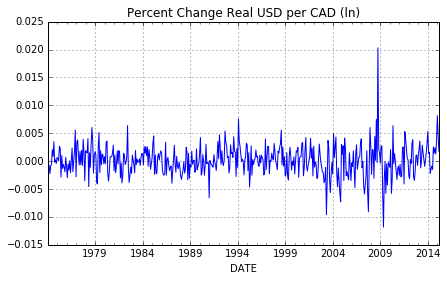

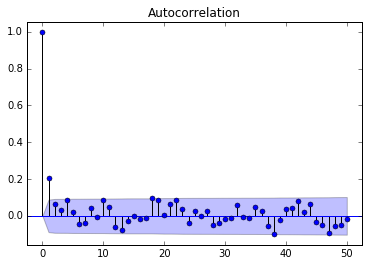

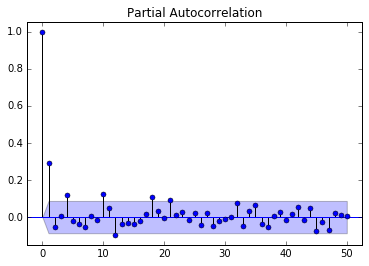

In [36]:
# Running the same process with the first difference of the ln(RER)
# Plot ln(real exchange rate)
fdata['realUSDCAD_ln_pct'] = fdata.realUSDCAD_ln.pct_change()
fdata['realUSDCAD_ln_pct'].dropna().plot(grid=True, figsize=(7, 4))
plt.title('Percent Change Real USD per CAD (ln)');
# np.diff(fdata['realUSDCAD_ln']).plot(grid=True, figsize=(7, 4))
# plt.title('First Difference: Real USD per CAD (ln)');
tsg.plot_acf(np.diff(fdata['realUSDCAD_ln'].dropna()), lags=50);
tsg.plot_pacf(np.diff(fdata['usdcad_ln'].dropna()), lags=50);
ts.adfuller(np.diff(fdata['realUSDCAD_ln'].dropna()), regression='c', autolag='AIC', regresults=True)

In [37]:
results = ts.adfuller(fdata['realUSDCAD_ln'].dropna(), regression='c')
print(results)[:3]

(-1.8738166249284101, 0.34447704939610696, 1L)


In [38]:
print(ts.adfuller(np.diff(fdata['realUSDCAD_ln'].dropna()), autolag='AIC', regression='c'))[:3]

(-17.969295937988836, 2.7992969267115446e-30, 0L)


ADF tests on the first differenced real exchange rate allow us to reject the null hypothesis of nonstationarity. 

In [39]:
#data = pd.read_csv('rer.csv', index_col=0, parse_dates=True)
#data.dropna().tail()

In [40]:
#import statsmodels.tsa.stattools as ts
#import statsmodels.graphics.tsaplots as tsg

# Plot ln(real exchange rate)
#data.dropna().plot(grid=True, figsize=(7, 4))
#plt.title('Real and Nominal USD per CAD (ln)');
# Plot ACF
#tsg.plot_acf(data['nom'].dropna(), lags=50);
# Plot PACF
#tsg.plot_pacf(data['nom'].dropna(), lags=50);
# Run Augmented Dickey Fuller Unit Root Test and print results
#results = ts.adfuller(data['real'].dropna())
#print(results)[:3]

In [41]:
import statsmodels.api as sm
import statsmodels.tools.tools as smtools
import statsmodels.tsa as tsa
VAR = tsa.vector_ar.var_model.VAR
model = VAR(data)

NameError: name 'data' is not defined

In [ ]:
results = model.fit(1)

results.summary()

In [ ]:
results.plot()

In [ ]:
results.plot_acorr()

In [ ]:
model.select_order(15)

In [ ]:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 5)

In [ ]:
irf = results.irf(10)
irf.plot(orth=False)

In [ ]:
irf.plot_cum_effects(orth=False)

In [ ]:
A = np.array([['E', 0], ['E','E']])
B = np.array([['E', 'E'], ['E','E']])

In [ ]:

import numpy as np
from statsmodels.tsa.api import VAR, SVAR
import matplotlib.pyplot as plt

In [ ]:
mymodel = SVAR(data, svar_type='A', A=A)
res = mymodel.fit(maxlags=1, maxiter=10000, maxfun=10000, solver='bfgs')
res.summary()
res.irf(periods=6).plot(impulse='nom', plot_stderr=False)